# ---- Bank Marketing Reserach Compaign data analysis ---

## *Developed by - Kaustubh Joshi*

## Data set description

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Attribute Information:

Input variables:

# bank client data:

    1.age (numeric)
    
    2.job : type of job (categorical: 'admin.','blue collar','entrepreneur','housemaid','management','retired','self-
    employed','services','student','technician','unemployed','unknown')
    
    3.marital : marital status (categorical: 'divorced','married','single','unknown'; note: 
    'divorced' means divorced or widowed)
    
    4.education (categorical:
    'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    
    5.default: has credit in default? (categorical: 'no','yes','unknown')
    
    6.housing: has housing loan? (categorical: 'no','yes','unknown')
    
    7.loan: has personal loan? (categorical: 'no','yes','unknown')related with the last contact of the current campaign:
    
    8.contact: contact communication type (categorical: 'cellular','telephone')
    
    9.month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
    10.day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
    11.duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.other attributes:
    
    12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
    13.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
    14.previous: number of contacts performed before this campaign and for this client (numeric)
    
    15.poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')social and economic context attributes
    
    16.emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
    17.cons.price.idx: consumer price index - monthly indicator (numeric)
    
    18.cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    
    19.euribor3m: euribor 3 month rate - daily indicator (numeric)
    
    20.nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Basic to do list -  These questions are necesssary to get one started on right path

Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?
    1. What is the Relation between type of job , marital status and Housing loan
    2. How Loan is affected by age, job, marital status
    3. Does education and jobs are correlated?
    4. Create a model predicting if client will subscribe for term deposite
    
Did you define the metric for success before beginning?
    1. Logical reasoning shall match
    2. Logical reasoning shall match
    3. Logical reasoning shall match
    4. 90% accuracy
    
Did you understand the context for the question and the scientific or business application?
    
    The Bank has carried out the marketing compaign and needs insights into the data
    
Did you record the experimental design?
    
    Dataset is available
    
Did you consider whether the question could be answered with the available data?
    
    Dataset consists of the 11162 records. So question shall be answered failry well

## Lets start analysis

The dataset is a .csv file which will be read using panda library. Below section will check basic data validity

In [22]:
import pandas as pd

client_data = pd.read_csv('D:\\LocalHome\\joshik\\Downloads\\bank_marketing.csv')
client_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Below section will give data disctribution overview

In [23]:
client_data['month']=client_data['month'].astype('category')
client_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


data seems to be well prepared as number of rows are consistent throughout and min and max values seems probable

### From above table data looks in a good health. Below we plot pair plot , to get pictorial overview of the complete data. Pairplot shows histograms of the columns in diagonal of the matrix and pairwise scatter plot of the data.

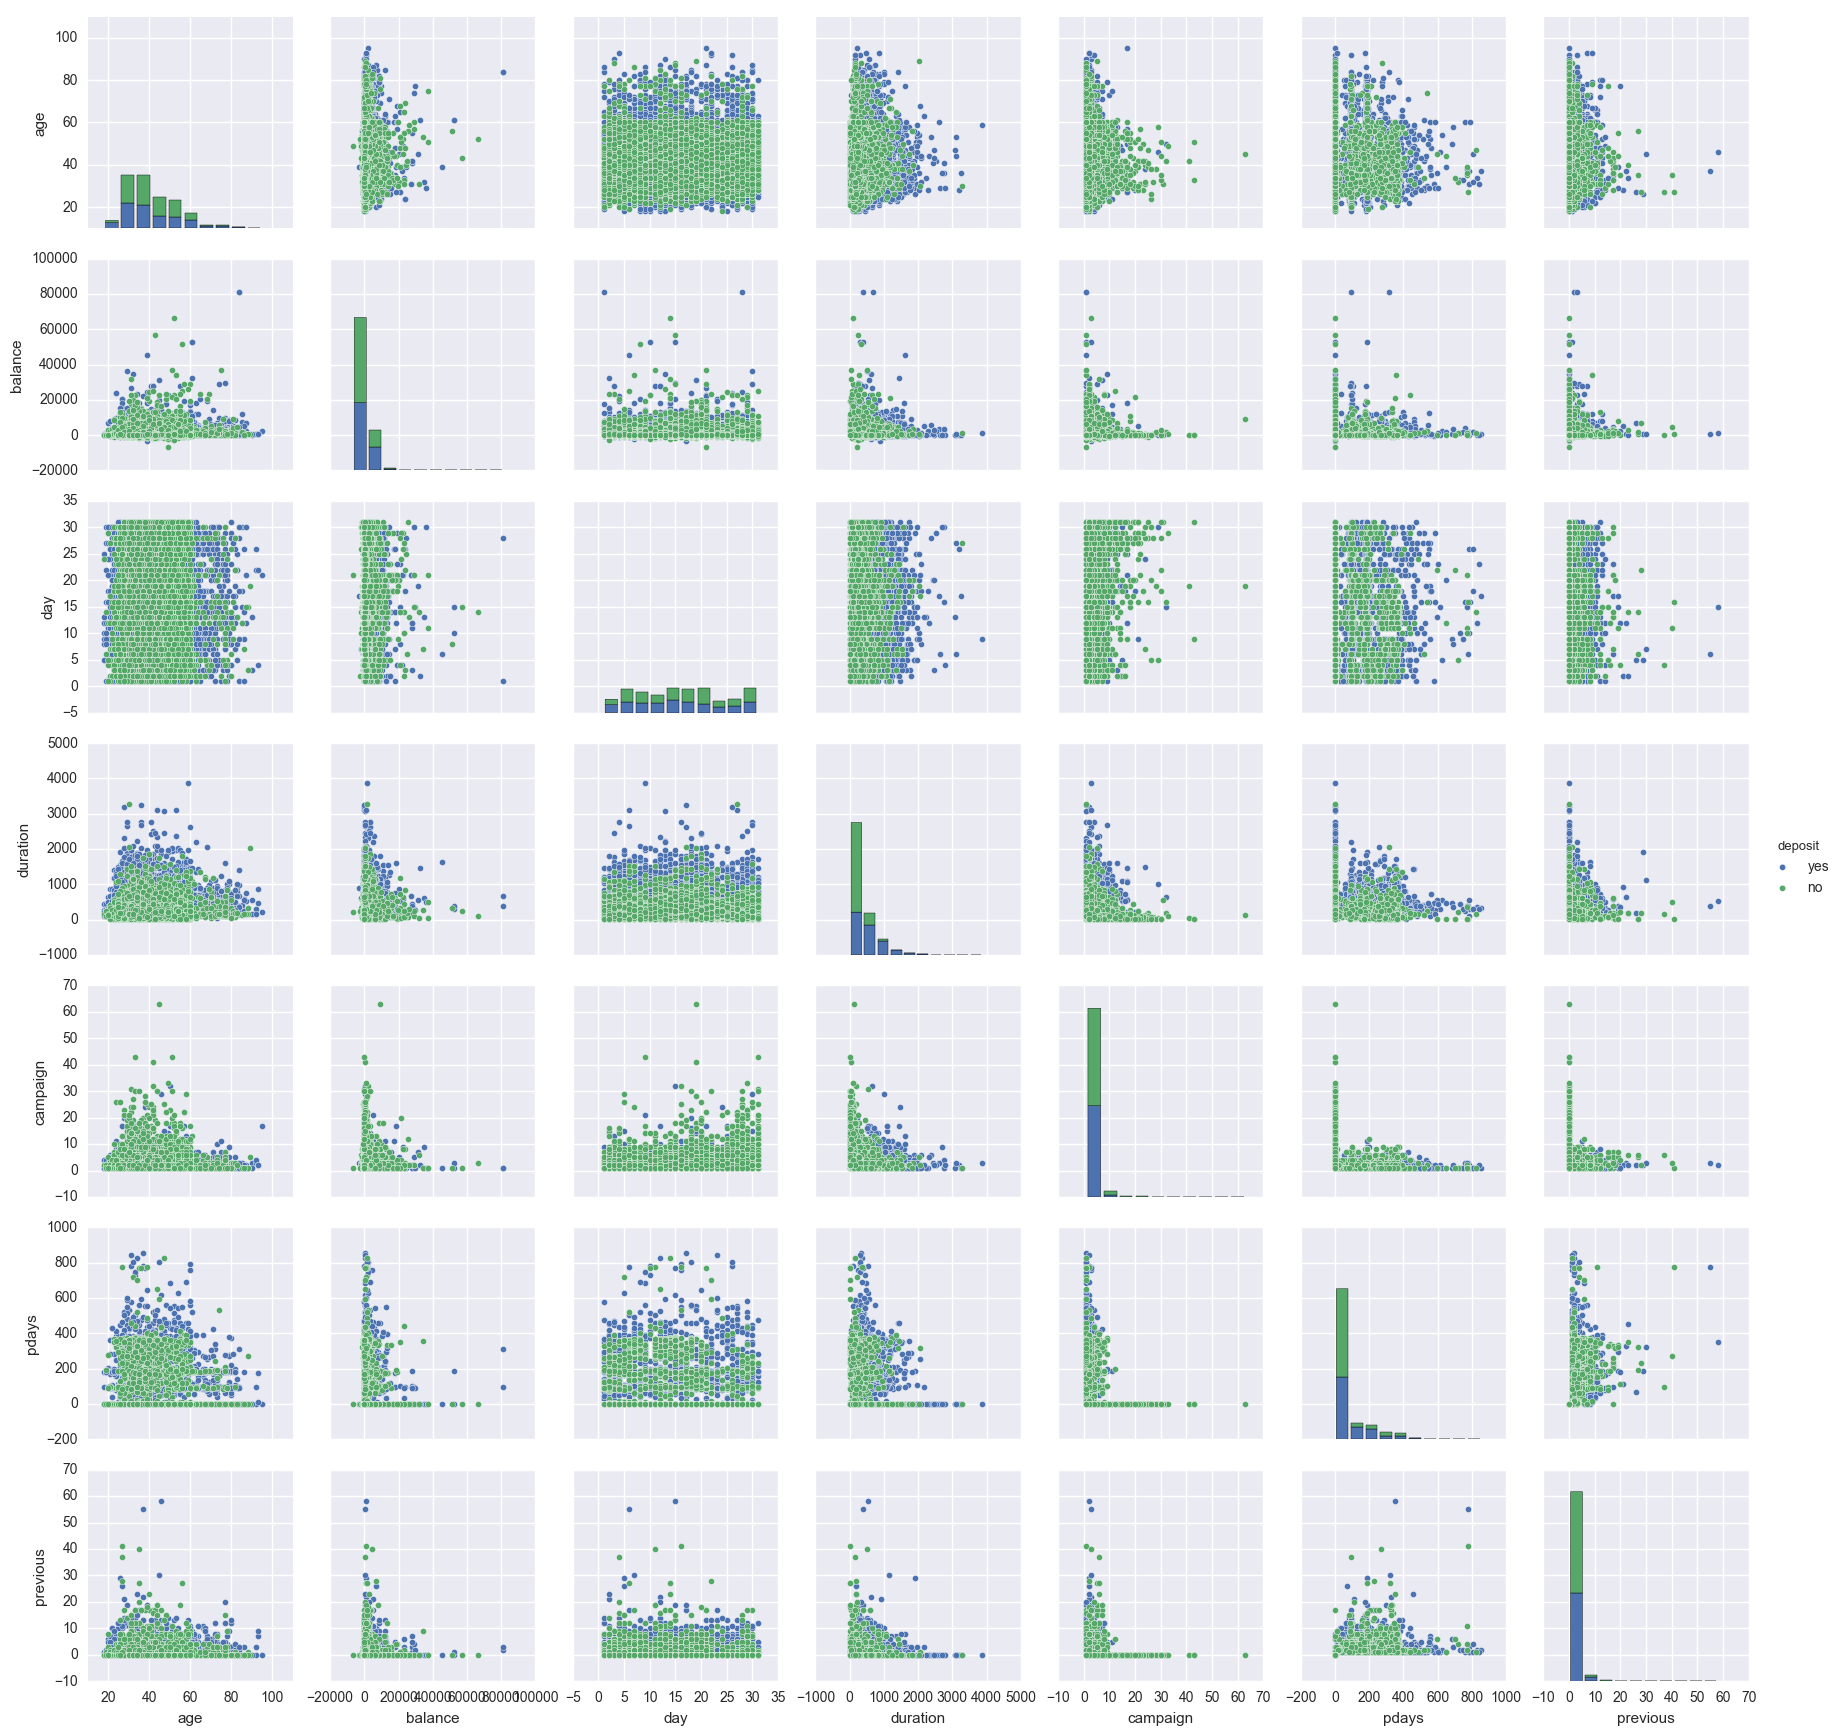

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(client_data, hue='deposit')

In [35]:
## Lets have closer look at the histograms

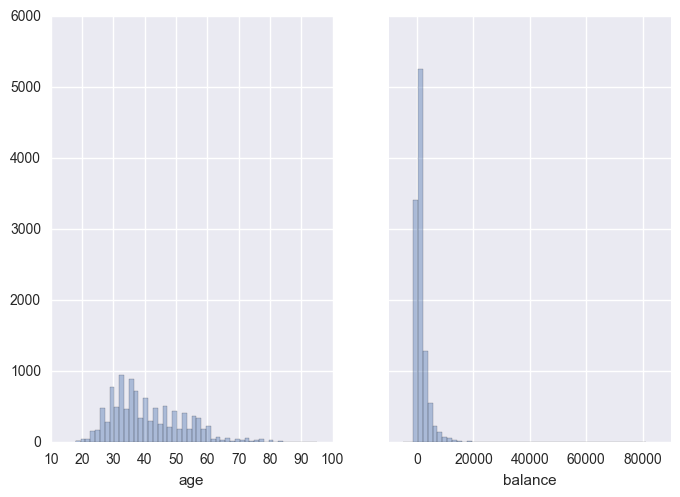

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sb.distplot(client_data['age'], kde=False, rug=False,ax=ax1)
sb.distplot(client_data['balance'], kde=False, rug=False,ax=ax2)

# Analysis - 

#### 1. Marketing campaign has targeted majority clients between age 30 - 40. 
#### 2. Balances of the clients falls mostly in the range of 0- 20000. Higher number of clients has lesser balance. Number of client decrese with increasing number of balance

In [26]:
client_below_20k = client_data.loc[client_data['balance']<20000]
print('Number of Clients having balance less than 20k = ' + str(client_below_20k['age'].shape[0]))
print('Number of Total Clients = ' + str(client_data.shape[0]))
print('Percentage of clients having balance less than 20k = ' + str(client_below_20k['age'].shape[0]/client_data.shape[0]*100))

Number of Clients having balance less than 20k = 11105
Number of Total Clients = 11162
Percentage of clients having balance less than 20k = 99.48933882816699


# Analysis -

#### 99.4% of clients are having balance less than 20k

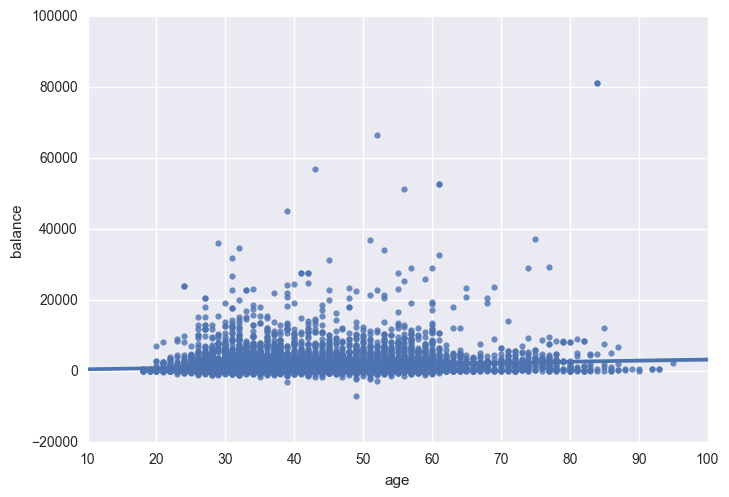

In [27]:

sb.regplot(x="age", y="balance", data=client_data)

...............................................................................................
# Analysis - 

#### There is no relation between age and balances of the clients
...............................................................................................

Let's have look at the marital status of the clients

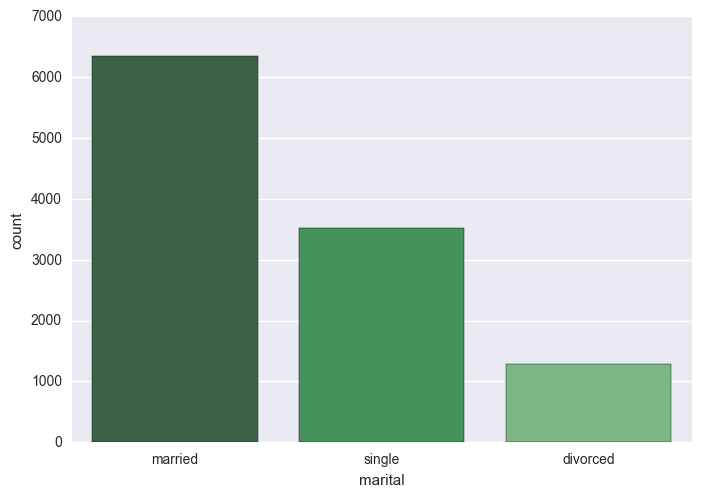

In [28]:
sb.countplot(x="marital", data=client_data, palette="Greens_d")

In [33]:
client_married = client_data.loc[client_data['marital']=='married']
client_single = client_data.loc[client_data['marital']=='single']
client_divorced = client_data.loc[client_data['marital']=='divorced']
print('Number of married Clients = ' + str(client_married['marital'].shape[0]))
print('Number of single Clients = ' + str(client_single['marital'].shape[0]))
print('Number of single Clients = ' + str(client_divorced['marital'].shape[0]))
print('Number of Total Clients = ' + str(client_data.shape[0]))
print('Percentage of married clients = ' + str(client_married['marital'].shape[0]/client_data.shape[0]*100))
print('Percentage of single clients = ' + str(client_single['marital'].shape[0]/client_data.shape[0]*100))
print('Percentage of divorced clients = ' + str(client_divorced['marital'].shape[0]/client_data.shape[0]*100))

Number of married Clients = 6351
Number of single Clients = 3518
Number of single Clients = 1293
Number of Total Clients = 11162
Percentage of married clients = 56.89840530370901
Percentage of single clients = 31.517649166815982
Percentage of divorced clients = 11.583945529475006


...............................................................................................
# Analysis - 

#### 1. 57% of the total clients contacte were married
#### 2. 31% of the total clients contacted were single
#### 3. 11% of the total clients contacted were divorced



## Educational qualification of clients

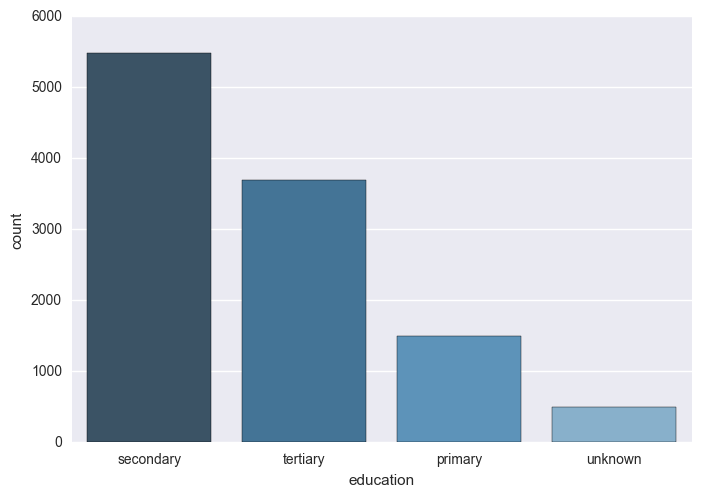

In [31]:
sb.countplot(x="education", data=client_data, palette="Blues_d")

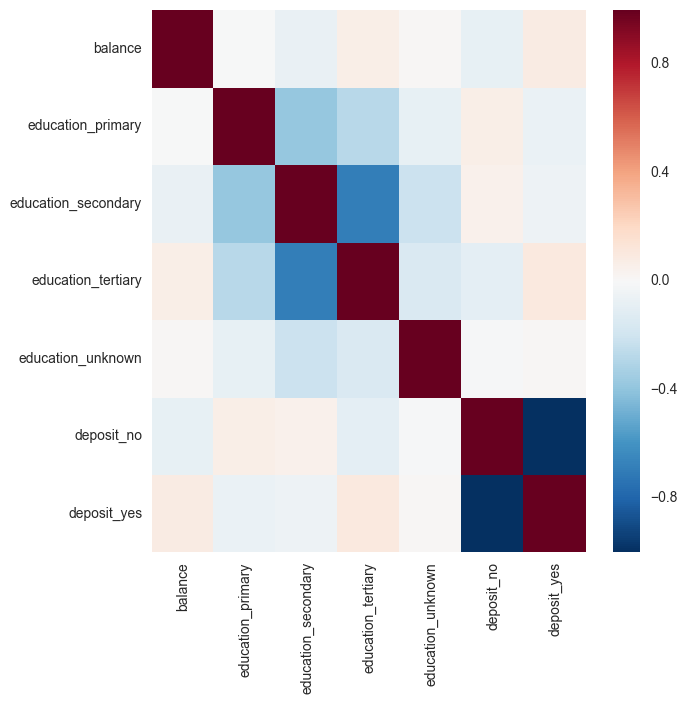

In [41]:
edu_client_data = client_data[['education','balance','deposit']]
edu_client_data.head()
edu_client_data = pd.get_dummies(edu_client_data)
corrmat = edu_client_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False)
plt.show()

# Analaysis

From above heat map its clear that, the clients having tertiary education are having better balances and having more number of term deposits.

## Distribution of clients job

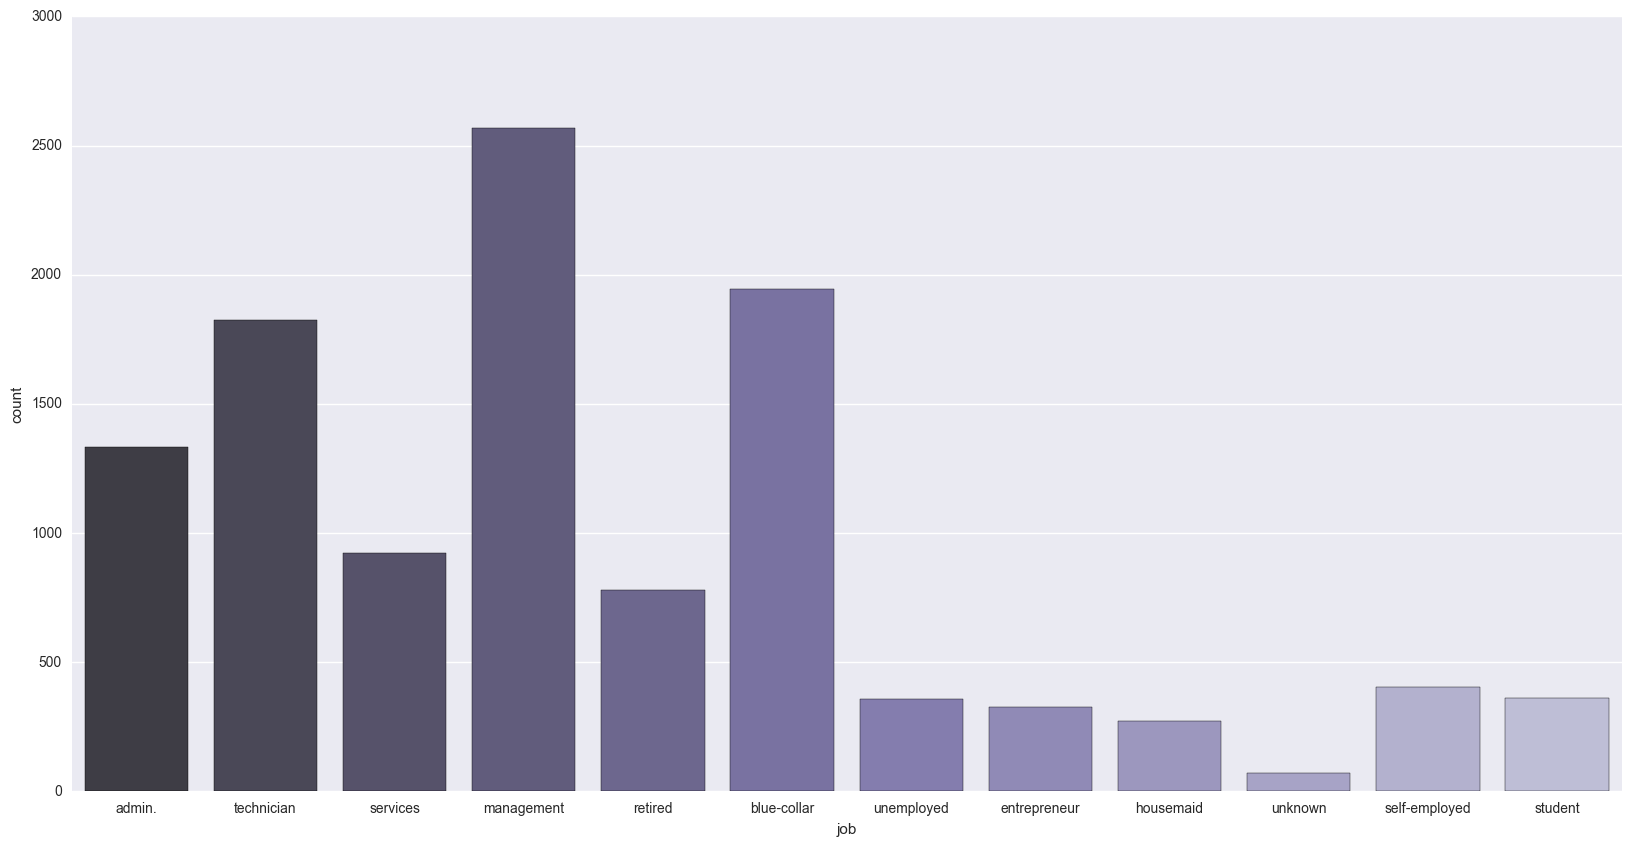

In [52]:
plt.figure(figsize=(20,10))
sb.countplot(x="job", data=client_data, palette="Purples_d")

# Analaysis

Majority of clients are having jobs in admin, technician, management or blue-collor

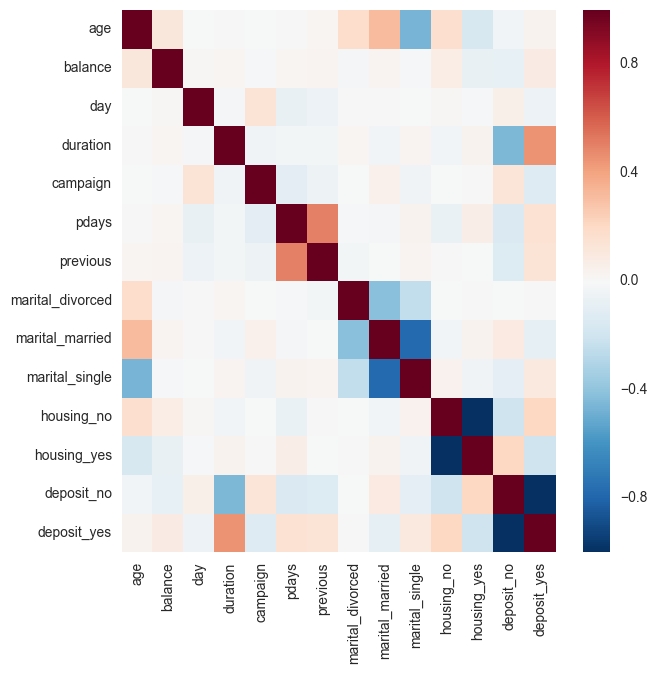

In [41]:
cols_to_transform = [ 'marital','housing','deposit']
client_data_dum = pd.get_dummies(client_data,columns = cols_to_transform)
corrmat = client_data_dum.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False)
plt.show()

Above is the correlation between different data columns.

# Analysis - 

1. There seems to be correlation exisiting between age and balance. That means with age, balance amount is increasing

2. High number of Married clients have no deposit and on the other hand higher number of single clients have term deposit. This due to the fact that married clients can not save much due to family responsibilities.

3. There is negative correlation between housing and term deposit. That means higher number of clients having housing loan are not having term deposit. This might be due to fact that, monthly installment of housing loan might causing financial burden which can be causing less balance so less deposit.



## Lets develop prediction model

We need to delete column 'duration', as its very highly correlated to the 'deposit'.


In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [8]:
client_data = client_data.drop(['month','day'],axis=1)
df1 = pd.get_dummies(client_data)
df1 = df1.drop(['duration'],axis=1)
df1 = df1.drop(['deposit_no'],axis=1)
y = df1['deposit_yes'].values
df1 = df1.drop(['deposit_yes'],axis=1)
X = df1.values
df1.head()

,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1,-1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,56,45,1,-1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,41,1270,1,-1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
3,55,2476,1,-1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,54,184,2,-1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)
y_val_l = log_reg.predict_proba(Xtest)
print(pd.DataFrame(y_val_l).idxmax(axis=1).values)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

[0 0 0 ..., 1 1 0]
Validation accuracy:  0.67765633399


In [11]:
sdg = SGDClassifier()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print("Validation accuracy: ", sum(y_val_l
                                   == ytest)/len(ytest))

Validation accuracy:  0.541480021502


In [16]:
adboost = AdaBoostClassifier()
adboost.fit(Xtrain, ytrain)
y_val_l = adboost.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.693424117542


In [20]:
gadaboost = GradientBoostingClassifier()
gadaboost.fit(Xtrain, ytrain)
y_val_l = gadaboost.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.694140834976


# Analysis - 

## Predictive model can predict if the client will opt for term deposite with accuracy close to the 70 %

In [14]:
import numpy as np
indices = np.argsort(adboost.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df1.columns[indices[f]],
                                      adboost.feature_importances_[indices[f]]))

Feature ranking:
1. feature 3 pdays (0.200000)
2. feature 1 balance (0.180000)
3. feature 2 campaign (0.160000)
4. feature 0 age (0.120000)
5. feature 4 previous (0.060000)
6. feature 32 contact_unknown (0.040000)
7. feature 35 poutcome_success (0.040000)
8. feature 22 education_tertiary (0.020000)
9. feature 6 job_blue-collar (0.020000)
10. feature 8 job_housemaid (0.020000)
11. feature 13 job_student (0.020000)
12. feature 15 job_unemployed (0.020000)
13. feature 18 marital_married (0.020000)
14. feature 34 poutcome_other (0.020000)
15. feature 31 contact_telephone (0.020000)
16. feature 28 loan_no (0.020000)
17. feature 27 housing_yes (0.020000)
18. feature 23 education_unknown (0.000000)
19. feature 10 job_retired (0.000000)
20. feature 33 poutcome_failure (0.000000)
21. feature 30 contact_cellular (0.000000)
22. feature 5 job_admin. (0.000000)
23. feature 29 loan_yes (0.000000)
24. feature 7 job_entrepreneur (0.000000)
25. feature 9 job_management (0.000000)
26. feature 11 job_sel

# Analysis

Below factor contribute mostly to the client opting for term deposit

    1.pdays - number of days that passed by after the client was last contacted from a previous campaign 
    2.balance of the client
    3.campaign: number of contacts performed during this campaign and for this client
    4.age of the client
    5.previous: number of contacts performed before this campaign and for this client
    